In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, clear_output

## Advanced Plotter Function
#### Can select time and x ranges to "zoom" in on function behavior.

Note: Copied from previous work.

In [44]:
def advanced_plotter(U, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot):
    
    dt = t_max/len(U)
    t_min_index = int(t_min_plot / dt)
    #*#t_max_index = int(t_max_plot / dt)
    t_max_index = int(t_max_plot / dt)
    print('t_min_index:',t_min_index)
    print('t_max_index:',t_max_index)
    
    dx = L/len(U[0])
    x_min_index = int(x_min_plot / dx)
    x_max_index = int(x_max_plot / dx)
    print('x_min_index:',x_min_index)
    print('x_max_index:',x_max_index)

    # Create slice to analyze
    U_slice = U[t_min_index:t_max_index]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('x')  # Set x-axis label
    ax.set_ylabel('u(t,x)')  # Set y-axis label

    # Set the y-axis limits
    y_min = min([min(u) for u in U_slice]) - 0.5  # Find the minimum y-value in U with some buffer
    y_max = max([max(u) for u in U_slice]) + 0.5  # Find the maximum y-value in U with some buffer
    ax.set_ylim(y_min, y_max)

    # Set the x-axis limits
    ax.set_xlim(x_min_plot, x_max_plot)
    
    lines = []  # List to store line objects
    alpha_decay = .5  # Factor to reduce the alpha of previous lines

    plt.show()
    
    interval = len(U_slice)//steps
    
    for i in np.arange(0, len(U_slice), interval):
        # Update the alpha values of existing lines
        
        for line in lines:
            line.set_alpha(line.get_alpha() * alpha_decay)
    
        # Compute scaled x-axis values
        x_values = np.linspace(0, L, len(U_slice[i]))
        x_values_used = x_values[x_min_index:x_max_index+1]
        
        # Add new line
        new_line, = ax.plot(x_values_used,U_slice[i][x_min_index:x_max_index+1], color='red', alpha=1.0)  # Start with full opacity
        lines.append(new_line)  # Store the new line object
        #ax.set_title(f"Plot at time = {i/(len(U_slice)-1)}s")  # Update the title with the current step
        ax.set_title(f"Plot at time, t = {round(t_min_plot + i*dt,3)}s")
        
        
        # Handling plot display
        clear_output(wait=True)  # Clear the previous plot
        display(fig)  # Display the current figure

        time.sleep(0.25)  # Pause for half a second before the next update   

## Inviscid Burgers using Explicit Method

1. Create grid and initialize.

In [3]:
# Create Grid
L = 3
t_max = 1

dx = .01
dt = .001

Nx = int(L/dx) + 1
Nt = int(t_max/dt)

x_grid = np.linspace(0,L,Nx)
t_grid = np.linspace(0,t_max,Nt)

# Initialize Array with initial conditions
U = []

u_t_x_0 = []

for x in x_grid:
    u_t_x_0.append(x * (x-1) * (x-3))
U.append(u_t_x_0)

2. Run the explicit algorithm.

In [4]:
for i in range(Nt):
    u_t_x = []
    
    u_line = U[-1]
    
    for j in range(1,Nx-1):
        # Equation 5.14 (slightly modified) to calculate u at each x value:
        u = -u_line[j] * (dt/(2*dx)) * (u_line[j+1] - u_line[j-1]) + u_line[j]
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,0)
    u_t_x.insert(len(u_line),0)

    # Now append the full solutions matrix
    U.append(u_t_x) 

3. Basic Plot

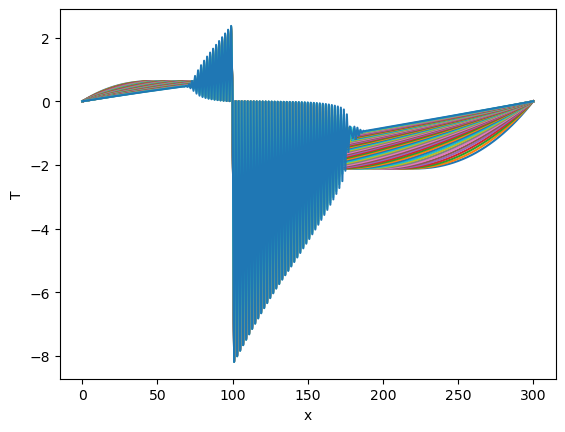

In [5]:
# Plotting t = 0 to t = 1000, in 20dt increments
for i in np.arange(0,len(U),20):
    plt.plot(U[i])
    plt.xlabel('x')
    plt.ylabel('T')
plt.show()

Shocks develop at x = 1 (x-axis at 10:1 scale) and around t = .45s.  Zooming in:

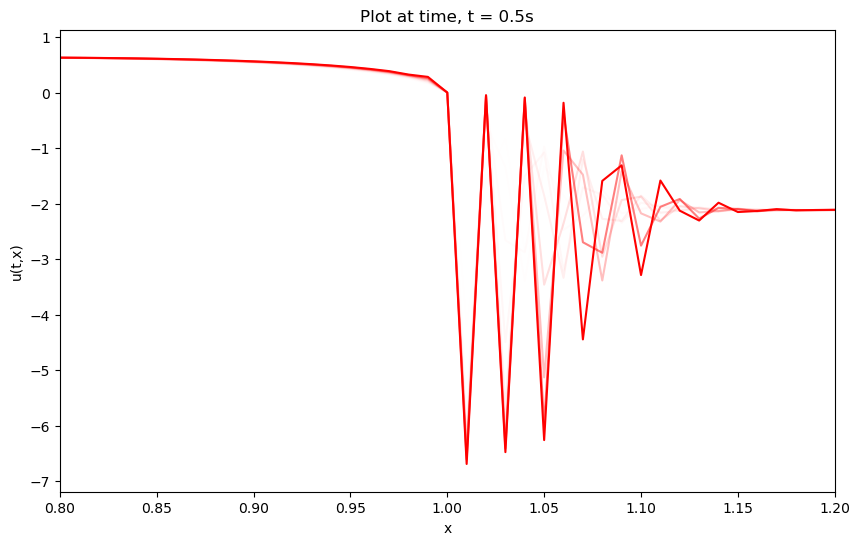

In [6]:
steps = 20
t_min_plot = .4             # default = 0
t_max_plot = .5      # default = len(U)
x_min_plot = .8            # default = 0
x_max_plot = 1.2          # default = L

advanced_plotter(U, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot)

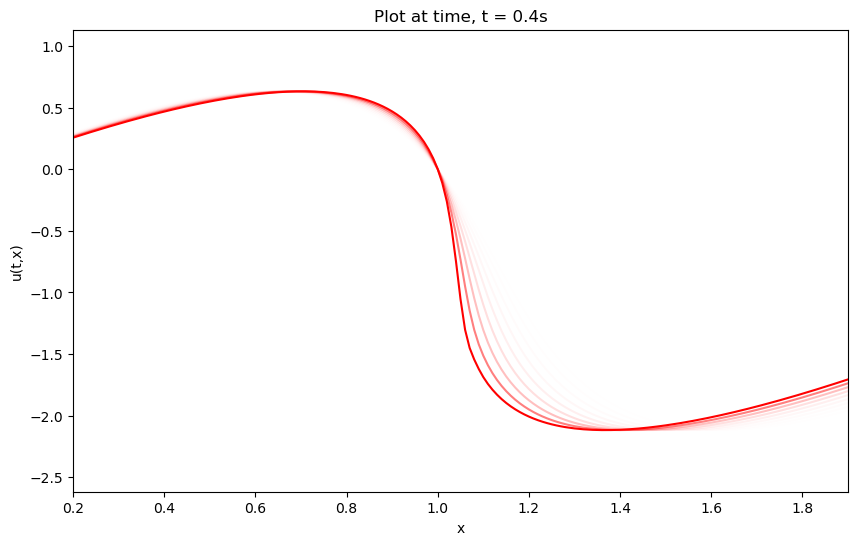

In [7]:
# advanced_plotter(U, L, t_max, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot)
advanced_plotter(U, L, t_max, 20, .1, .4, .2, 1.9)

## Sidebar: Node vs Grid number 

All PDE solution methods should be able to take in either a desired dx & dt (node increment spacing), or the desired number of time and space nodes to anayze.  Length, maximum time, and any necessary diffusion/transport coefficients also need to be specified ny the user.

Comparing the two methods, in general:

In [8]:
# User defined givens:
L = 3 # Length of Rod
t_max = 1 # Length of time to analyze

x_grid_nodes = 30 # Desired number of x nodes to analyze
t_grid_nodes = 500 # Desired number of time steps to analyze
print(x_grid_nodes,t_grid_nodes)

dx = .1 # Node width to analyze
dt = .002 # Time step to analyze


# Calculated Results
x_nodes = int(L/dx) + 1 # Should equal x_grid_nodes
t_nodes = int(t_max/dt) + 1 # Should equal t_grid_nodes
print(x_nodes,t_nodes)

n_dx = L/x_grid_nodes
n_dt = t_max/t_grid_nodes

(x_grid_nodes == x_nodes -1),(t_grid_nodes == t_nodes - 1),((dx,dt) == (n_dx, n_dt))

30 500
31 501


(True, True, True)

#### Option 1: Enter desired number of nodes

In [18]:
# Length of Rod:
L = 3

# Length of time to analyze:
t_max = 1

# Desired number of nodes (really partitions)
x_grid_nodes = 30

# Desired number of time steps to analyze
t_grid_nodes = 500

In [19]:
# Calcs
dx = L/x_grid_nodes
dt = t_max/t_grid_nodes

x_grid = np.linspace(0,L,x_grid_nodes+1) # two boundary nodes at 0 & L, rest are inner nodes
t_grid = np.linspace(0,t_max,t_grid_nodes+1) # Need to change node here by +1 for proper t-intervals

In [29]:
dt, dx, len(x_grid), x_grid, len(t_grid), t_grid

(0.002,
 0.1,
 31,
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. ]),
 501,
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
        0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
        0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
        0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
        0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
        0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
        0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
        0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
        0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
        0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
        0.198

#### Option 2: Enter desired time and space intervals (dx and dt)

In [26]:
# Length of Rod:
L = 3

# Length of time to analyze:
t_max = 1

# Desired size of spatial step
dx = .1

# Desired size of time step
dt = .002

In [27]:
# Calcs
x_grid_nodes = int(L/dx)
t_grid_nodes = int(t_max/dt)

x_grid = np.linspace(0,L,x_grid_nodes+1) # two boundary nodes at 0 & L, rest are inner nodes
t_grid = np.linspace(0,t_max,t_grid_nodes+1) # Need to change node here by +1 for proper t-intervals

In [30]:
x_grid_nodes, t_grid_nodes, len(x_grid), x_grid, len(t_grid), t_grid

(30,
 500,
 31,
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. ]),
 501,
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
        0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
        0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
        0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
        0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
        0.108, 0.11 , 0.112, 0.114, 0.116, 0.118, 0.12 , 0.122, 0.124,
        0.126, 0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142,
        0.144, 0.146, 0.148, 0.15 , 0.152, 0.154, 0.156, 0.158, 0.16 ,
        0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176, 0.178,
        0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194, 0.196,
        0.198, 0

### Now back to boundary conditions

In [31]:
# Boundary Condition Functions (Direchelet - time domain)

def u_t_0(t):
    '''
    Assigns the initial value for the 0-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float]    
    '''    
    return t

def u_t_L(t):
    '''
    Assigns the initial value for the L-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return 0

# Initial Condition Functions

def u_0_x(x):
    '''
    Assigns the initial values for u (non-boundary points).
    If the initial value is a constant, leave function as-is.
    If the initial value is a function of x, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return x * (x - 1) * (x - 3)

In [33]:
# Create solution data holder
U = []

# Input initial conditions (t = 0)
u_t_x_0 = []

for x in x_grid:
    u_t_x_0.append(u_0_x(x))

u_t_x_0[0] = u_t_0(0)
u_t_x_0[-1] = u_t_L(0)

U.append(u_t_x_0)
len(U[0]),U

(31,
 [[0,
   0.261,
   0.44800000000000006,
   0.5670000000000001,
   0.624,
   0.625,
   0.576,
   0.4829999999999999,
   0.352,
   0.18899999999999997,
   -0.0,
   -0.2090000000000002,
   -0.4320000000000004,
   -0.6630000000000001,
   -0.8960000000000004,
   -1.125,
   -1.344,
   -1.5470000000000004,
   -1.7280000000000002,
   -1.8810000000000002,
   -2.0,
   -2.079,
   -2.112,
   -2.093,
   -2.0159999999999996,
   -1.875,
   -1.6639999999999997,
   -1.3769999999999993,
   -1.007999999999999,
   -0.5509999999999982,
   0]])

In [35]:
def invisic_burgers_1D_explicit(u_line,m,dt,dx):
    '''
    Takes in
    u_line - an 1D array
    j - a time index
    dt - time step
    dx - x step
    '''
    return  u_line[m] * ((dt/(2*dx)) * (u_line[m-1] - u_line[m+1]) + 1)

In [37]:
for i in range(len(t_grid)):
    u_t_x = []
    
    u_previous = U[-1]
    
    for j in range(1,len(x_grid)-1):
        # Equation 5.14 (slightly modified) to calculate u at each x value:
        #! - Note: can use classes or other methods to choose which function is used
        u = invisic_burgers_1D_explicit(u_previous,j,dt,dx)
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,u_t_0(i*dt))
    u_t_x.append(u_t_L(i*dt))
    print(u_t_x)

    # Now append the full solutions matrix
    U.append(u_t_x) 

[0.0, 0.25983072, 0.4466291200000001, 0.5660020800000001, 0.62363808, 0.6253, 0.57681792, 0.4840819199999999, 0.35303487999999994, 0.18966527999999996, -0.0, -0.20990288000000024, -0.4339612800000004, -0.6660763200000002, -0.9001395200000004, -1.1300400000000002, -1.3496716800000002, -1.5529404800000004, -1.7337715200000001, -1.8861163200000004, -2.00396, -2.0813284800000003, -2.1122956800000003, -2.09099072, -2.0116051199999996, -1.8684, -1.6557132799999996, -1.3679668799999993, -0.9996739199999989, -0.5454459199999981, 0]
[0.002, 0.2586702403417744, 0.4452616695491401, 0.5650002056046137, 0.623268275590232, 0.6255927664604799, 0.57763249119172, 0.4851652132366662, 0.354074273431724, 0.19033486459364962, -0.0, -0.2108137772248051, -0.4359408960992444, -0.6691814228656329, -0.9043158404421267, -1.1351198932208644, -1.3553794480131443, -1.5589053218989757, -1.7395480278254412, -1.8912123890160404, -2.007871973601536, -2.0835833013618417, -2.1124997750781116, -2.088885289734484, -2.00712

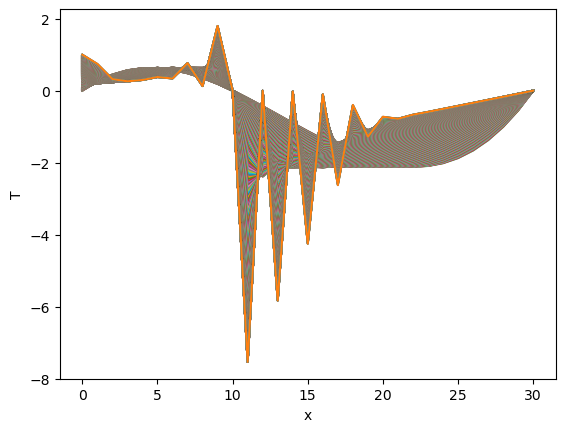

In [38]:
# Plotting t = 0 to t = 1000, in 20dt increments
for i in range(len(U)):
    plt.plot(U[i])
    plt.xlabel('x')
    plt.ylabel('T')
plt.show()

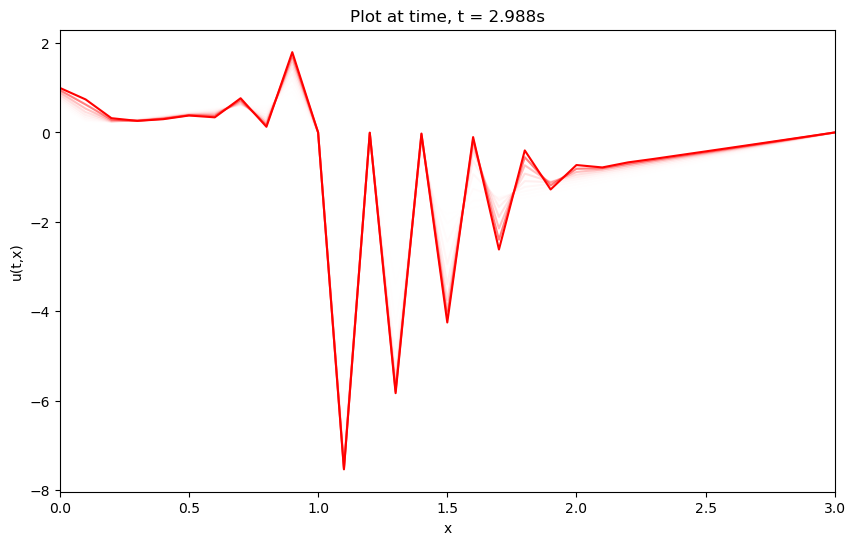

In [45]:
advanced_plotter(U, L, t_max, 20, 0, 3, 0, L)

## Crank-Nicholson

In [ ]:
# Parameters
L = 1          # Length of the domain
N = 10           # Number of spatial points
dx = L / N        # Spatial step size
dt = 0.1         # Time step size
T = 2.0           # Total time
timesteps = int(T / dt)

# Initial condition: a sine wave
x = np.linspace(0, L, N)
u = np.sin(2 * np.pi * x / L)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(x, u, label='Initial condition')

def burgers_crank_nicolson(u):
    unew = np.copy(u)
    for n in range(timesteps):
        un = np.copy(unew)
        for i in range(1, N-1):
            # Nonlinear terms using averages
            term_n = 0.5 * un[i] * (un[i+1] - un[i-1])
            term_new = 0.5 * unew[i] * (unew[i+1] - unew[i-1])
            # Crank-Nicolson scheme
            unew[i] = un[i] - 0.5 * dt / dx * (term_n + term_new)
        # Periodic boundary conditions
        unew[0] = unew[-2]
        unew[-1] = unew[1]
        plt.plot(x, unew)
    return unew

# Run the simulation
u_final = burgers_crank_nicolson(u)

plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

## Appendices

Original "Simple" Heat Plotter Function

In [ ]:
def heat_plotter(U, L, t_max, steps):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('x')  # Set x-axis label
    ax.set_ylabel('T')  # Set y-axis label

    # Set the y-axis limits
    y_min = min([min(u) for u in U]) - 0.5  # Find the minimum y-value in U with some buffer
    y_max = max([max(u) for u in U]) + 0.5  # Find the maximum y-value in U with some buffer
    ax.set_ylim(y_min, y_max)

    # Set the x-axis limits
    ax.set_xlim(0, L)
    
    lines = []  # List to store line objects
    alpha_decay = .9  # Factor to reduce the alpha of previous lines

    plt.show()

    for i in np.arange(0, len(U), len(U)//steps):
        # Update the alpha values of existing lines
        for line in lines:
            line.set_alpha(line.get_alpha() * alpha_decay)

        # Compute scaled x-axis values
        x_values = np.linspace(0, 2, len(U[i]))
        
        # Add new line
        new_line, = ax.plot(x_values,U[i], color='red', alpha=1.0)  # Start with full opacity
        lines.append(new_line)  # Store the new line object
        ax.set_title(f"Plot at time = {i/(len(U)-1)}s")  # Update the title with the current step

        # Handling plot display
        clear_output(wait=True)  # Clear the previous plot
        display(fig)  # Display the current figure

        time.sleep(0.25)  # Pause for half a second before the next update